## Portfolio Part 2

The goal of the second Portfolio task is to train linear regression models to predict users' ratings towards movies. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will continue using the movielens dataset provided in Portfolio task 1. 

### Q1: Import Cleaned MovieLens Dataset
Save the cleaned data (i.e., after removing missing values and outliers) in the Portfolio task 1 as a csv file named 'movielens_data_clean.csv'. You may need to use the Pandas method, i.e., `to_csv`, for doing this. After that, please import the csv file (i.e., 'movielens_data_clean') and print out its total length.

In [4]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

In [5]:
#Q1: Importing the cleaned dataframe
df = pd.read_csv('files/movielens_data_clean.csv') 
print("Length:",len(df))

Length: 91441


### Q2: Explore the Dataset



* 2.1: Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column. 
* 2.2: As our goal is to predict ratings given other columns, please get the correlations between age/gender/genre/occupation and rating by using the `corr()` method.
* 2.3: To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, genre and occupation) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* 2.4: Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [6]:
#Q2.1
df.head()

,userId,age,gender,occupation,movieId,rating,genre,timestamp
0,196,49.0,M,writer,242,3.0,Comedy,881250949
1,22,25.0,M,writer,377,1.0,Children,878887116
2,244,28.0,M,technician,51,2.0,Romance,880606923
3,298,44.0,M,executive,474,4.0,War,884182806
4,253,26.0,F,librarian,465,5.0,Adventure,891628467


In [7]:
# Q2.1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91441 entries, 0 to 91440
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   userId      91441 non-null  int64  
 1   age         91441 non-null  float64
 2   gender      91441 non-null  object 
 3   occupation  91441 non-null  object 
 4   movieId     91441 non-null  int64  
 5   rating      91441 non-null  float64
 6   genre       91441 non-null  object 
 7   timestamp   91441 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 5.6+ MB


In [14]:
# Q2.3: Converting Categorical Vairables into Numerical Variables
# Building a new dataframe containing only the object columns
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,gender,occupation,genre
0,M,writer,Comedy
1,M,writer,Children
2,M,technician,Romance
3,M,executive,War
4,F,librarian,Adventure


In [15]:
# Q2.3
# Here is the complete dictionary for the three input variables (gender, occupation, genre)
cleanup_nums = {"gender":     {"F": 0, "M": 1 },
                "occupation":     {"student": 19, "other": 18,"educator": 17, "engineer": 16,"programmer": 15, 
                                   "administrator": 14,"writer": 13, "librarian": 12,"technician": 11, "executive": 10, 
                                   "healthcare": 9,"artist": 8, "entertainment": 7,"marketing": 6, "retired": 5, 
                                   "scientist": 4,"lawyer": 3, "salesman": 2,"doctor": 1, "homemaker": 0},
               "genre":           {"Drama": 0, "Comedy": 1,"Action": 2, "Romance": 3,"Thriller": 4, 
                                   "Sci-Fi": 5,"Horror": 6, "Adventure": 7,"Crime": 8, "Children": 9, 
                                   "Mystery": 10,"War": 11, "Musical": 12,"Animation": 13, "Western": 14, 
                                   "Film-Noir": 15,"Documentary": 16, "Fantasy": 17,"unknown": 18}}


In [16]:
# Q2.3
#The replace command is used and the categorical data is converted in numerical data. 
obj_df = obj_df.replace(cleanup_nums)

# adding required categorical columns to the object dataframe
obj_df['rating']=df['rating']
obj_df['age']=df['age']
obj_df['gender cat']=df['gender']
obj_df['occupation cat']=df['occupation']
obj_df['genre cat']=df['genre']
obj_df.head()

,gender,occupation,genre,rating,age,gender cat,occupation cat,genre cat
0,1,13,1,3.0,49.0,M,writer,Comedy
1,1,13,9,1.0,25.0,M,writer,Children
2,1,11,3,2.0,28.0,M,technician,Romance
3,1,10,11,4.0,44.0,M,executive,War
4,0,12,7,5.0,26.0,F,librarian,Adventure


In [17]:
# Q2.2
obj_df.corr()

,gender,occupation,genre,rating,age
gender,1.000000,-0.001211,0.025016,0.005132,0.040854
occupation,-0.001211,1.000000,0.005406,0.022263,-0.286480
genre,0.025016,0.005406,1.000000,0.006867,-0.012078
rating,0.005132,0.022263,0.006867,1.000000,0.060732
age,0.040854,-0.286480,-0.012078,0.060732,1.000000


**Q2.4: Observation and Analysis**
On the above table, the corr() is used to find the pairwise correlation of all columns in the object dataframe. Upon looking at the table, we can find out the correlation of vairous variables such as age, occupation, gender and genre with the rating variable. We can clearly deduce that the correlation between age and rating is the highest (0.060732) followed by occupation and rating at 0.022263. Genre had the least correlation with rating (0.006867) followed by gender(0.005132). 

Summary:
* Highest Correlation: Age and Rating (0.060732)
* Second-highest Correlation: Occupation and Rating (0.022263)
* Second-lowest Correlation: Gender and Rating (0.005132)
* lowest Correlation: Genre and Rating (0.006867)

If the correlation is closer to 1, it is said to have a higher predictive power. However, in this scenario, all a pairwise correlation is closer to 0 instead which may suggest that there is a weak correlation between the pairs and even a large change in these variables would have little effect on the ratings. The higher the correlation, the more the predictive power. However, if the correlation is less, so will the predictive power. In this scenario, it would be wise to use the variables with the highest correlation to get better predictive results instead of lowest correlation variables. Inorder to train a regression model to predict the rating, it would better to take age and occupation as input variables as they have the highest correlation.

### Q3: Split Training and Testing Data



* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set. 
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Q3.1: Case 1 - training data containing 10% of the entire data;
    * Q3.2: Case 2 - training data containing 90% of the entire data. 
* Print the shape of training and testing sets in the two cases. 

In [18]:
feature_cols = ['gender', 'occupation']
X = obj_df[feature_cols]
y = obj_df['rating']



In [111]:
#Q3.1: Case 1 - Training data containing 10% of the entire data;
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9) 
print("Train set shape:",X_train.shape)
print("Test set shape:",X_test.shape)

Train set shape: (9144, 2)
Test set shape: (82297, 2)


In [112]:
#Q3.2: Case 2 - Training data containing 90% of the entire data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print("Train set shape:",X_train.shape)
print("Test set shape:",X_test.shape)

Train set shape: (82296, 2)
Test set shape: (9145, 2)


### Q4: Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results. 
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features regarding rating, respectively. 
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

### Model-A

In [19]:
# Model-A Train Test Split

# (model-a) using the training/testing data in case 1 with two most correlated input features
train, test = train_test_split(obj_df,test_size=.9, random_state=2)

#Age and Occupation is the two most correlated input features
X_train_a= train[["age","occupation"]] 
y_train_a = train['rating']
X_test_a = test[["age","occupation"]]
y_test_a = test['rating']

reg_a = linear_model.LinearRegression()
reg_a.fit(X_train_a,y_train_a)
print("y = ", reg_a.coef_, "* X + ", reg_a.intercept_) 

y =  [0.00727087 0.01112595] * X +  3.1239187296242843


In [20]:
#Prediction Cell
prediction_train_a = reg_a.predict(X_train_a)
modeltrain_a_mse =mean_squared_error(y_train_a, prediction_train_a)
modeltrain_a_rmse =np.sqrt(mean_squared_error(y_train_a, prediction_train_a))
print("Train set performance:")
print("MSE:", modeltrain_a_mse)
print("Root MSE:", modeltrain_a_rmse)
print("")
prediction_test_a = reg_a.predict(X_test_a)
modeltest_a_mse = mean_squared_error(y_test_a, prediction_test_a)
modeltest_a_rmse = np.sqrt(mean_squared_error(y_test_a, prediction_test_a))
print("Test set performance:")
print("MSE:", modeltest_a_mse)
print("Root MSE:", modeltest_a_rmse)

Train set performance:
MSE: 1.2455369066640651
Root MSE: 1.1160362479167356

Test set performance:
MSE: 1.2689980143326394
Root MSE: 1.1264981199862871


### Model-B

In [21]:
# (model-b) using the training/testing data in case 1 with two least correlated input features
train, test = train_test_split(obj_df,test_size=.9, random_state=2)
# Gender and Genre is the two least correlated input features
X_train_b = train[["gender","genre"]]
y_train_b = train['rating']
X_test_b = test[["gender","genre"]]
y_test_b = test['rating']

reg_b = linear_model.LinearRegression()
reg_b.fit(X_train_b,y_train_b)
print("y = ", reg_b.coef_, "* X + ", reg_b.intercept_)

y =  [0.04957376 0.00293938] * X +  3.476473411391647


In [22]:
#Prediction Cell
prediction_train_b = reg_b.predict(X_train_b)
modeltrain_b_mse =mean_squared_error(y_train_b, prediction_train_b)
modeltrain_b_rmse =np.sqrt(mean_squared_error(y_train_b, prediction_train_b))
print("Train set performance:")
print("MSE:", modeltrain_b_mse)
print("Root MSE:", modeltrain_b_rmse)
print("")
prediction_test_b = reg_b.predict(X_test_b)
modeltest_b_mse = mean_squared_error(y_test_b, prediction_test_b)
modeltest_b_rmse = np.sqrt(mean_squared_error(y_test_b, prediction_test_b))
print("Test set performance:")
print("MSE:", modeltest_b_mse)
print("Root MSE:", modeltest_b_rmse)

Train set performance:
MSE: 1.2523120935762961
Root MSE: 1.1190675107321704

Test set performance:
MSE: 1.2760914626830366
Root MSE: 1.129642183473615


### Model-C

In [23]:
# (model-c) using the training/testing data in case 2 with two most correlated input features
train, test = train_test_split(obj_df,test_size=.1, random_state=2)
X_train_c = train[["age","occupation"]]
y_train_c = train['rating']
X_test_c = test[["age","occupation"]]
y_test_c = test['rating']

reg_c = linear_model.LinearRegression()
reg_c.fit(X_train_c,y_train_c)
print("y = ", reg_c.coef_, "* X + ", reg_c.intercept_)

y =  [0.00700965 0.01066672] * X +  3.1332292722972457


In [24]:
#Prediction Cell
prediction_train_c = reg_c.predict(X_train_c)
modeltrain_c_mse =mean_squared_error(y_train_c, prediction_train_c)
modeltrain_c_rmse =np.sqrt(mean_squared_error(y_train_c, prediction_train_c))
print("Train set performance:")
print("MSE:", modeltrain_c_mse)
print("Root MSE:", modeltrain_c_rmse)
print("")
prediction_test_c = reg_c.predict(X_test_c)
modeltest_c_mse= mean_squared_error(y_test_c, prediction_test_c)
modeltest_c_rmse=np.sqrt(mean_squared_error(y_test_c, prediction_test_c))
print("Test set performance:")
print("MSE:", modeltest_c_mse)
print("Root MSE:", modeltest_c_rmse)

Train set performance:
MSE: 1.267245642993
Root MSE: 1.1257200553392481

Test set performance:
MSE: 1.2609637496538848
Root MSE: 1.1229264221906459


### Model-D

In [25]:
# (model-d) using the training/testing data in case 2 with two least correlated input features
train, test = train_test_split(obj_df,test_size=0.1, random_state=2)

X_train_d = train[["genre","gender"]]
y_train_d = train['rating']
X_test_d = test[["genre","occupation"]]
y_test_d = test['rating']

reg_d = linear_model.LinearRegression()
reg_d.fit(X_train_d,y_train_d)
print("y = ", reg_d.coef_, "* X + ", reg_d.intercept_)

y =  [0.00213481 0.01488616] * X +  3.49878576465353


In [26]:
#Prediction Cell
prediction_train_d = reg_d.predict(X_train_d)
modeltrain_d_mse =mean_squared_error(y_train_d, prediction_train_d)
modeltrain_d_rmse =np.sqrt(mean_squared_error(y_train_d, prediction_train_d))
print("Train set performance:")
print("MSE:", modeltrain_d_mse)
print("Root MSE:", modeltrain_d_rmse)
print("")
prediction_test_d = reg_d.predict(X_test_d)
modeltest_d_mse = mean_squared_error(y_test_d, prediction_test_d)
modeltest_d_rmse = np.sqrt(mean_squared_error(y_test_d, prediction_test_d))
print("Test set performance:")
print("MSE:", modeltest_d_mse)
print("Root MSE:", modeltest_d_rmse)

Train set performance:
MSE: 1.2738728409081106
Root MSE: 1.1286597542696872

Test set performance:
MSE: 1.3092201715011704
Root MSE: 1.1442115938501805


### Q5: Evaluate Models
* 5.1: Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* 5.2: Print the results of the four models regarding the two metrics

### Evaluation and Analysis (Answer to Q4 & Q5.1)

**Impacts of the size of training/testing data on the model performance**

Comparing Model-A and Model-C
* In the training set performance, Model A seems to have the lower MSE as the training size is very less (1.245537) in comparison to Model C (1.267246). This is because it is predicting the value that it has already trained. The Training set consists of only 10% of the entire data. If the size of the training set is very small, it might result in lesser MSE. THats why sample size matters alot!

* In the testing set performance, Model-C seems to have lesser MSE (1.260964) and RMSE (1.122926) than Model-A (1.268998, 1.126498). This is because the Model-A's training data consists of 90% of the entire data. Therefore, when predicting the value of the testing data, it would provide accurate predictions in comparison to Model-A whose test size is 90%. 


**Impacts of feature selection on the model performance**

Comparing Model-C and Model-D
* Looking at both and testing training set performance, the MSE and Root MSE for Model-C is lower than that of Model-D. This is because Model-C is trained with the two most correlated input variables (Age, Occupation) whereas Model-D is trained with the least correlated ones (Gender, Genre). This results the MSE and RMSE to be lower in the training set. Lower MSE results in better forecast, therefore, Model-C is well suited for that as it has the better feature selection.

In [26]:
#Q5.2: Print the results of the four models regarding the two metrics
data = {'Model':  ['Model-A', 'Model-B', 'Model-C','Model-D'],
        'Test_MSE': [modeltest_a_mse, modeltest_b_mse, modeltest_c_mse,modeltest_d_mse],
        'Test_RMSE': [modeltest_a_rmse, modeltest_b_rmse, modeltest_c_rmse,modeltest_d_rmse],
        'Train_MSE': [modeltrain_a_mse, modeltrain_b_mse, modeltrain_c_mse,modeltrain_d_mse],
        'Train_RMSE': [modeltrain_a_rmse, modeltrain_b_rmse, modeltrain_c_rmse,modeltrain_d_rmse]
        }

metrics = pd.DataFrame(data)
metrics


,Model,Test_MSE,Test_RMSE,Train_MSE,Train_RMSE
0,Model-A,1.268998,1.126498,1.245537,1.116036
1,Model-B,1.276091,1.129642,1.252312,1.119068
2,Model-C,1.260964,1.122926,1.267246,1.125720
3,Model-D,1.309220,1.144212,1.273873,1.128660


### Q6: Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

In [29]:
TestMetrics = pd.DataFrame()
TestMetrics["Models"] = metrics["Model"]
TestMetrics["MSE"] = metrics["Test_MSE"]
TestMetrics


,Models,MSE
0,Model-A,1.268998
1,Model-B,1.276091
2,Model-C,1.260964
3,Model-D,1.309220


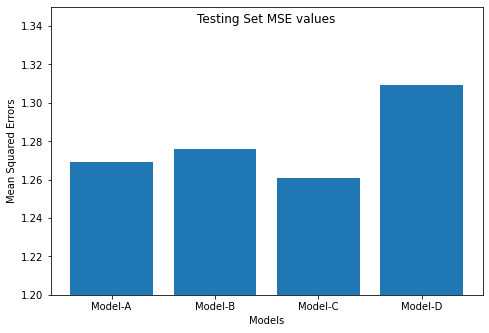

In [35]:
#Q6
fig = plt.figure(1)
ax = fig.add_axes([0,0,1,1])
ax.bar(TestMetrics["Models"],TestMetrics["MSE"])
plt.ylabel('Mean Squared Errors')
plt.xlabel('Models')
plt.ylim((1.2,1.35))
plt.suptitle('Testing Set MSE values')

plt.show()

### Observation
On the bar chart shown above, we can clearly deduce that Model-C is the best model for predicting the rating as it has the lowest Mean Squared Error. This is because this model has a training set which consists of 90% of the entire data and it also takes the most correlated input variables into account. However, Model-D seems to have the highest mean squared error followed by Model-B. This huge difference between these two models may be due to difference in the test sizes. Either way, since they took the least correlated input variables they have higher Mean squared errors, therefore, low predictive power. 